## 1. Load the libraries,dataset,print the shape and visulaise images


In [1]:
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/'My Drive/Colab Notebooks'
train_path = "/content/drive/My Drive/Colab Notebooks/PGP_AIML_DL/Week-3_Project/plant-seedlings-classification.zip"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


In [ ]:
# create a temp_train folder
# %cd '/content/drive/My Drive/Colab Notebooks/PGP_AIML_DL/Week-3_Project/'
# !mkdir temp_train

In [3]:
# check for my project folder inside My Drive folder
!ls '/content/drive/My Drive/Colab Notebooks/PGP_AIML_DL/Week-3_Project/'

 plant-seedlings-classification.zip
'Problem Statement -- Image Classification using CNNs in Keras.pdf'
 temp_train


In [ ]:
train_path

'/content/drive/My Drive/Colab Notebooks/PGP_AIML_DL/Week-3_Project/plant-seedlings-classification.zip'

In [ ]:
# this code is meant to run only once so commented out
# from zipfile import ZipFile
# with ZipFile(train_path, 'r') as zip:
#   zip.extractall('/content/drive/My Drive/Colab Notebooks/PGP_AIML_DL/Week-3_Project/temp_train')

In [4]:
# check files are extracted
!ls '/content/drive/My Drive/Colab Notebooks/PGP_AIML_DL/Week-3_Project/temp_train'

sample_submission.csv  train


In [5]:
# using only images from train folder
path="/content/drive/My Drive/Colab Notebooks/PGP_AIML_DL/Week-3_Project/temp_train/train/*/*.png"
files= glob(path)
train_img=[] # create list to store image data
train_label=[]
j=1
num=len(files)


#testing the code for one sample
# print(files[1])
# read_img=cv2.imread(files[1])
# plt.imshow(read_img)
# gray_img = cv2.cvtColor(read_img,cv2.COLOR_BGR2GRAY)
# resized_img = cv2.resize(gray_img, (128,128), interpolation = cv2.INTER_AREA)
# plt.imshow(resized_img,'gray')
# plt.show()
# train_img.append(resized_img)
# print('train_img:',train_img)
# train_label.append(files[1].split('/')[-2])
# print(train_label)
# print(files[1])
for i,img in enumerate(files):
# for i in range(0,100):
  print(str(j) + "/" + str(num), end="\r")
  read_img=cv2.imread(img) # to gray scale
  gray_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2GRAY) # convert color image to gray scale
  resized_img = cv2.resize(gray_img, (128,128), interpolation = cv2.INTER_AREA) # resize is to size the images to a common dimension
  train_img.append(resized_img)
  train_label.append(img.split('/')[-2]) # get the class label name from the folder where .png files sit
  j=j+1
train_img = np.asarray(train_img)  # Train images set
train_label = pd.DataFrame(train_label)  # Train labels set

In [6]:
# shape of data
print("shape of dataset:",train_img.shape)

shape of dataset: (4750, 128, 128)


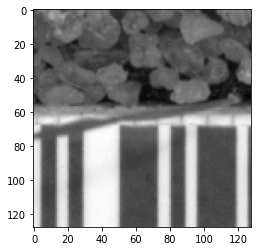

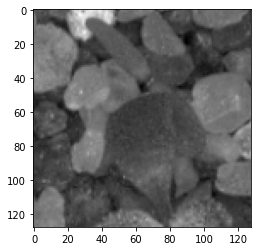

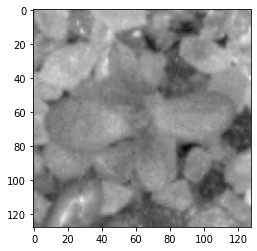

In [7]:
# visualise the data of few samples.
plt.imshow(train_img[0],cmap='gray')
plt.show()
plt.imshow(train_img[2234],cmap='gray')
plt.show()
plt.imshow(train_img[3344],cmap='gray')
plt.show()

## 2. Data Preprocessing


In [8]:
#normalization
train_img_normal=train_img.astype("float32")/255
train_img_normal
print("shape of dataset:",train_img_normal.shape)
print("max value:",train_img_normal.max())

shape of dataset: (4750, 128, 128)
max value: 1.0


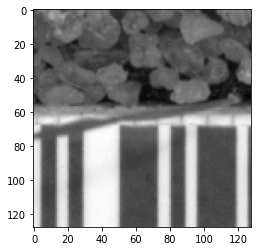

In [9]:
# Gaussian blurring
for i in train_img_normal:
  Gaussian1 = cv2.GaussianBlur(train_img_normal, (5, 5), 0)
# original normalised image
plt.imshow(train_img_normal[0],cmap='gray')
plt.show()




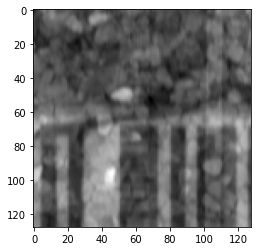

In [10]:
# Visualize data after preporcessing. sample data from index[1]. 
plt.imshow(Gaussian1[0],cmap='gray')

In [11]:
X=Gaussian1 # allocating Gaussian blurred dataset to variable X
y=train_label

label_dict =  {'Black-grass':0, 'Charlock':1, 'Cleavers':2, 'Common Chickweed':3, 'Common wheat':4, 'Fat Hen':5, 'Loose Silky-bent':6, 'Maize':7, 'Scentless Mayweed':8, 'Shepherds Purse':9,'Small-flowered Cranesbill':10,
               'Sugar beet':11}
# this is to have keras.to_categorical method work properly
y[1] = y[0].apply(lambda i: label_dict.get(i))

y[1]
Y=y[1]
Y

0        0
1        0
2        0
3        0
4        0
        ..
4745    11
4746    11
4747    11
4748    11
4749    11
Name: 1, Length: 4750, dtype: int64

##3. Make Data Compatible


In [12]:
## Split the dataset
# initial split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
# second split 
X_Validation,X_test2,y_validation,y_test2 = train_test_split(X_test,y_test,test_size=0.5)

In [ ]:
y_train

2710     6
1188     3
2741     6
1732     4
3537     8
        ..
4426    11
466      1
3092     7
3772     9
860      2
Name: 1, Length: 3325, dtype: int64

In [13]:
# Reshape data into Keras compatible shapes
X_train_reshaped = X_train.reshape(X_train.shape[0],128,128,1) # gray scale parameter given
X_Validation_reshaped = X_Validation.reshape(X_Validation.shape[0],128,128,1) # gray scale parameter given
X_test_reshaped = X_test.reshape(X_test.shape[0],128,128,1) # gray scale parameter given
X_test2_reshaped= X_test2.reshape(X_test2.shape[0],128,128,1) # gray scale parameter given
X_train_reshaped[9, :, :, :].shape

(128, 128, 1)

In [14]:
# Convert Labels from digits to one hot vectors
from tensorflow.keras.utils import to_categorical
y_train= to_categorical(y_train,num_classes=12)
y_test = to_categorical(y_test,num_classes=12)
y_validation = to_categorical(y_validation,num_classes=12)
y_test2= to_categorical(y_test2,num_classes=12)
y_validation[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [15]:
#Print the label y_train[0]
print(y_train.shape)
print(y_train[0])

(3325, 12)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## 4. Building CNN


In [17]:
# Define layer
#kernel_size as 3x3
#filter 32
from tensorflow.keras.layers  import Conv2D
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(128,128,1)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(12,activation='softmax'))

In [19]:
#Setting optimizers and loss function
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
# Use earlystopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callback =EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# # Fit the model
# model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_Validation_reshaped, y_validation), callbacks=[callback])


##5. Fit and evaluate the model

In [20]:
# X_train_reshaped.shape
y_train.shape

(3325, 12)

In [22]:
model.fit(x=X_train_reshaped,y=y_train,batch_size=40,epochs=10,validation_data=(X_Validation_reshaped,y_validation),callbacks=[callback])

Epoch 1/10
84/84 [==============================] - 158s 2s/step - loss: 2.7526 - accuracy: 0.1317 - val_loss: 2.4361 - val_accuracy: 0.1236
Epoch 2/10
84/84 [==============================] - 157s 2s/step - loss: 2.3954 - accuracy: 0.1510 - val_loss: 2.3578 - val_accuracy: 0.1629
Epoch 3/10
84/84 [==============================] - 158s 2s/step - loss: 2.2862 - accuracy: 0.1994 - val_loss: 2.2018 - val_accuracy: 0.2654
Epoch 4/10
84/84 [==============================] - 159s 2s/step - loss: 2.0996 - accuracy: 0.2974 - val_loss: 1.9784 - val_accuracy: 0.3596
Epoch 5/10
84/84 [==============================] - 159s 2s/step - loss: 1.8244 - accuracy: 0.4045 - val_loss: 1.7586 - val_accuracy: 0.4494
Epoch 6/10
84/84 [==============================] - 160s 2s/step - loss: 1.5410 - accuracy: 0.5125 - val_loss: 1.6625 - val_accuracy: 0.4719
Epoch 7/10
84/84 [==============================] - 160s 2s/step - loss: 1.2831 - accuracy: 0.5919 - val_loss: 1.4887 - val_accuracy: 0.5337
Epoch 8/10
84

In [ ]:
# model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
# model.fit(x=X_train_reshaped,y=y_train,batch_size=40,epochs=10,validation_data=(X_Validation_reshaped,y_validation))

In [23]:
model.evaluate(X_test2_reshaped,y_test2)

23/23 [==============================] - 7s 312ms/step - loss: 0.9085 - accuracy: 0.7097


[0.9085410237312317, 0.7096773982048035]

## 6. Visualize predictions for x_test[2],x_test[3],x_test[33],x_test[36],x_test[59]

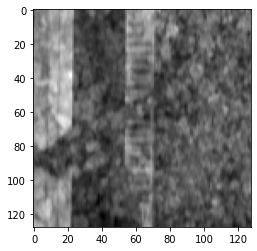

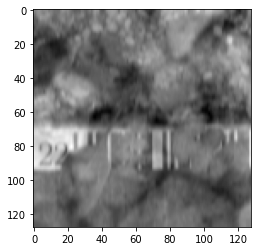

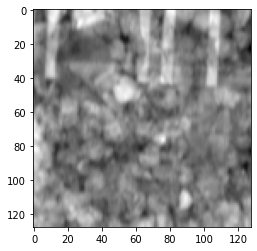

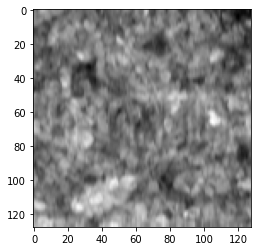

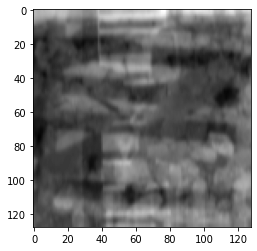

array([[1.2963036e-05, 2.7340047e-06, 3.6213352e-10, 2.1891507e-04,
        1.2707538e-03, 1.5916260e-03, 1.5943416e-04, 1.6385164e-03,
        3.9071519e-06, 6.5109831e-05, 1.5636567e-07, 9.9503583e-01]],
      dtype=float32)

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
x_test=X_test2_reshaped.reshape(X_test2_reshaped.shape[0],128,128,1)
x_test

plt.imshow(x_test[2].reshape(128,128), cmap='gray')
plt.show()
plt.imshow(x_test[3].reshape(128,128), cmap='gray')
plt.show()
plt.imshow(x_test[33].reshape(128,128), cmap='gray')
plt.show()
plt.imshow(x_test[36].reshape(128,128), cmap='gray')
plt.show()
plt.imshow(x_test[59].reshape(128,128), cmap='gray')
plt.show()
y_pred2 = model.predict(x_test[2].reshape(1, 128, 128, 1))
y_pred2

# print(y_pred.sum())
# plt.imshow(X_test2_reshaped[2])
# plt.imshow(X_test[2]*255)

## 5. Confusion Matrix continued from section 5



In [61]:
print("Predicted label:", y_pred2.argmax())
print("Softmax Outputs:", y_pred2)

Predicted label: 11
Softmax Outputs: [[1.2963036e-05 2.7340047e-06 3.6213352e-10 2.1891507e-04 1.2707538e-03
  1.5916260e-03 1.5943416e-04 1.6385164e-03 3.9071519e-06 6.5109831e-05
  1.5636567e-07 9.9503583e-01]]


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test[2], y_pred2)

ValueError: ignored